In [22]:
import numpy as np
import pandas as pd
import imblearn
import pickle
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score
from sklearn import metrics
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from collections import Counter
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [23]:
data = pd.read_csv("merged_df.csv")


In [24]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data

,Artist,Name,Genre,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,grammy_win
0,LIL NAS X,OLD TOWN ROAD,"COUNTRY,ATLANTA,ALTERNATIVE COUNTRY,HIP-HOP,TR...",0.118093,0.000000,0.058824,0.0
1,"SHAWN MENDES, CAMILA CABELLO",SENORITA,POP,0.384799,0.136735,0.209412,0.0
2,BILLIE EILISH,BAD GUY,"HIP-HOP,DARK POP,HOUSE,TRAP,MEMES,ALTERNATIVE ...",0.450932,0.010204,0.129412,0.0
3,KHALID,TALK,"SYNTH-POP,POP",0.307484,0.020408,0.211765,0.0
4,"ED SHEERAN, JUSTIN BIEBER",I DON'T CARE,"CANADA,UK,DANCE,DANCE-POP,POP",0.354845,0.010204,0.058824,0.0
...,...,...,...,...,...,...,...
6454,FATBOY SLIM,PRAISE YOU,"TECHNO,POP",0.883851,0.357143,0.211765,0.0
6455,COLLIN RAYE,ANYONE ELSE,COUNTRY,0.901129,0.367347,0.211765,0.0
6456,TRICK DADDY,NANN,RAP,0.690269,0.622449,0.211765,0.0
6457,CLAY WALKER,SHE'S ALWAYS RIGHT,POP,0.835929,0.744898,0.047059,0.0


In [5]:
model_data=data.copy()
model_data.drop(['Artist','Name','Genre'],inplace=True,axis=1)

In [6]:
model_data

,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,grammy_win
0,0.118093,0.000000,0.058824,0.0
1,0.384799,0.136735,0.209412,0.0
2,0.450932,0.010204,0.129412,0.0
3,0.307484,0.020408,0.211765,0.0
4,0.354845,0.010204,0.058824,0.0
...,...,...,...,...
6454,0.883851,0.357143,0.211765,0.0
6455,0.901129,0.367347,0.211765,0.0
6456,0.690269,0.622449,0.211765,0.0
6457,0.835929,0.744898,0.047059,0.0


In [7]:
X = model_data[['Weekly_rank_avg', 'Peak_Position', 'Weeks_on_Chart'] ].copy()
y = model_data['grammy_win'].copy()
# summarize class distribution
counter = Counter(y)
print(counter)


Counter({0.0: 6287, 1.0: 172})


In [25]:
X = model_data[['Weekly_rank_avg', 'Peak_Position', 'Weeks_on_Chart'] ].copy()
y = model_data['grammy_win'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=11)



smote = SMOTE( k_neighbors=4,random_state = 11)

lg=LogisticRegression(random_state=11, max_iter=1000)
                                                              
pipeline = Pipeline([('smote', smote),
                     ('classifier', lg)])

                                                              
stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=11)

param_grid=  [{'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

grid_search1 = GridSearchCV(pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           )

grid_search1.fit(X,y)
print(grid_search1.best_score_)
print(grid_search1.best_params_)


0.7855024243823749
{'classifier': LogisticRegression(C=1.623776739188721, solver='liblinear'), 'classifier__C': 1.623776739188721, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=11)


smote = SMOTE( k_neighbors=4,random_state = 11)
X_train, y_train = smote.fit_resample(X, y)
lg=LogisticRegression(random_state=11, max_iter=1000)
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
print(classification_report(y_test, y_pred))

LogisticRegression(max_iter=1000, random_state=11)

In [11]:
y_pred=lg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.85       633
         1.0       0.06      0.85      0.12        13

    accuracy                           0.75       646
   macro avg       0.53      0.80      0.49       646
weighted avg       0.98      0.75      0.84       646



In [9]:
y_pred_grid=grid_search1.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

         0.0       0.99      0.77      0.86       629
         1.0       0.08      0.71      0.14        17

    accuracy                           0.76       646
   macro avg       0.53      0.74      0.50       646
weighted avg       0.97      0.76      0.84       646



In [10]:
logisticModel=LogisticRegression(C=1.623776739188721, solver='liblinear')
logisticModel.fit(X,y)

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [11]:
y_pred=logisticModel.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)


,Prediction,Actual
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [28]:
df = pd.DataFrame([[28.454545,1,49]], columns = ['Weekly_rank_avg', 'Peak_Position',"Weeks_on_Chart"])
song = df[['Weekly_rank_avg', 'Peak_Position', 'Weeks_on_Chart'] ].copy()

y_pred=logisticModel.predict(song)
df["prediction"]=y_pred
df["actual"]=1.0
df["song"]="Bad Guy"
df

,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,prediction,actual,song
0,28.454545,1,49,1.0,1.0,Bad Guy


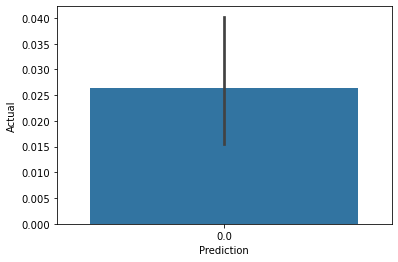

In [109]:
ax = sns.barplot(x="Prediction", y="Actual",  data=results)


In [110]:


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       629
         1.0       0.00      0.00      0.00        17

    accuracy                           0.97       646
   macro avg       0.49      0.50      0.49       646
weighted avg       0.95      0.97      0.96       646



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


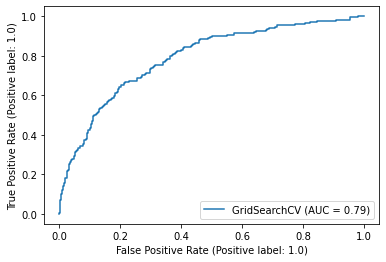

In [26]:
plot_roc_curve(grid_search1, X_,y )

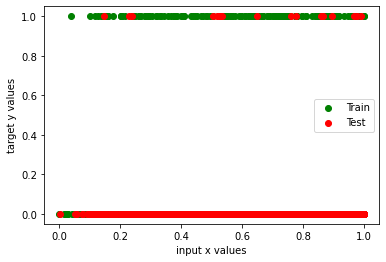

In [112]:

plt.scatter(X_train.iloc[:,0],y_train, color = "green", label = "Train")
plt.scatter(X_test.iloc[:,0],y_test ,color = "red", label = "Test")
plt.xlabel("input x values")
plt.ylabel("target y values")
plt.legend()
plt.show()




In [113]:
X = model_data[['Weekly_rank_avg', 'Peak_Position', 'Weeks_on_Chart'] ].copy()
y = model_data['grammy_win'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=11)

smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)


stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=11)
knn = KNeighborsClassifier(n_neighbors=5)        
krange = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=krange, weights=weight_options)


grid_search = GridSearchCV(knn, param_grid, cv=stratified_kfold, scoring='roc_auc')


grid_search.fit(X_train, y_train)
print(grid_search.cv_results_)

print(grid_search.best_score_)
print(grid_search.best_params_)

cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
print(Counter(y_train))

{'mean_fit_time': array([0.01037188, 0.01037552, 0.00988104, 0.01028631, 0.01165578,
       0.01057115, 0.01034229, 0.01056268, 0.0112565 , 0.01007104,
       0.00977991, 0.01006331, 0.01067553, 0.01059358, 0.01010075,
       0.01019745, 0.01022093, 0.00979002, 0.01065695, 0.01151688,
       0.01034942, 0.00994949, 0.01026988, 0.01037989, 0.01034696,
       0.00997591, 0.00993705, 0.01019418, 0.00966003, 0.00988214,
       0.00987754, 0.00972509, 0.01009722, 0.01038744, 0.00956192,
       0.00991569, 0.00978105, 0.00967355, 0.00996618, 0.00973039,
       0.00976593, 0.00987616, 0.00998282, 0.01000965, 0.01030881,
       0.00996964, 0.00981181, 0.01024549, 0.00953557, 0.00983059,
       0.00977976, 0.01012375, 0.01056998, 0.01007187, 0.00998125,
       0.01002529, 0.00996518, 0.01002967, 0.01009359, 0.01008968]), 'std_fit_time': array([9.29036942e-04, 4.94005372e-04, 8.28424906e-04, 1.10804433e-03,
       9.27641920e-04, 7.96897038e-04, 6.53688267e-04, 8.99606500e-04,
       1.10108349e

In [114]:
# train your model using all data and the best known parameters

# instantiate model with best parameters
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')

# fit with X and y, not X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86       629
         1.0       0.05      0.41      0.08        17

    accuracy                           0.76       646
   macro avg       0.51      0.59      0.47       646
weighted avg       0.96      0.76      0.84       646



In [115]:
y_pred=grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86       629
         1.0       0.05      0.41      0.08        17

    accuracy                           0.76       646
   macro avg       0.51      0.59      0.47       646
weighted avg       0.96      0.76      0.84       646



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=11)


smote = SMOTE( k_neighbors=4,random_state = 11)
X_train, y_train = smote.fit_resample(X, y)
knn = KNeighborsClassifier(n_neighbors=5)        
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93       633
         1.0       0.13      1.00      0.23        13

    accuracy                           0.86       646
   macro avg       0.56      0.93      0.58       646
weighted avg       0.98      0.86      0.91       646



In [116]:
y_pred=grid_search.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,1.0,0.0
8,0.0,0.0
9,1.0,0.0


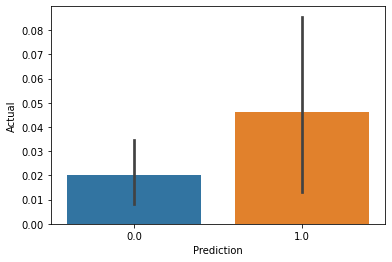

In [117]:
ax = sns.barplot(x="Prediction", y="Actual",  data=results)


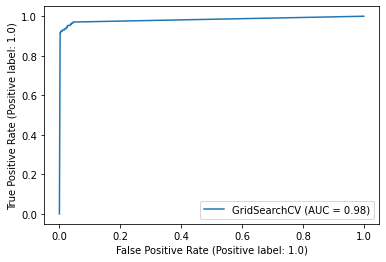

In [118]:
plot_roc_curve(grid_search, X,y )

In [119]:

X = model_data[['Weekly_rank_avg', 'Peak_Position', 'Weeks_on_Chart'] ].copy()
y = model_data['grammy_win'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=11)

smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)

DecisionTreeClassifier = DecisionTreeClassifier()        

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=11)
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

grid_search2 = GridSearchCV(DecisionTreeClassifier, tree_para, cv=stratified_kfold, scoring='roc_auc')


grid_search2.fit(X_train, y_train)
print(grid_search2.best_score_)
print(grid_search2.best_params_)
print(grid_search2.best_estimator_)

cv_score = grid_search2.best_score_
test_score = grid_search2.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
print(Counter(y_train))

0.9317229198114442
{'criterion': 'gini', 'max_depth': 11}
DecisionTreeClassifier(max_depth=11)
Cross-validation score: 0.9317229198114442
Test score: 0.6405592443654727
Counter({0.0: 5658, 1.0: 5658})


In [120]:
y_pred=grid_search2.predict(X_test)

In [123]:
dt=DecisionTreeClassifier(criterion='gini',max_depth= 12)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       629
         1.0       0.02      0.12      0.03        17

    accuracy                           0.79       646
   macro avg       0.49      0.47      0.46       646
weighted avg       0.95      0.79      0.86       646



In [124]:
print(confusion_matrix(y_test, y_pred))

print(accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))

[[511 118]
 [ 15   2]]
0.7941176470588235
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       629
         1.0       0.02      0.12      0.03        17

    accuracy                           0.79       646
   macro avg       0.49      0.47      0.46       646
weighted avg       0.95      0.79      0.86       646



In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=9)


smote = SMOTE( k_neighbors=4,random_state = 11)
X_train_smote, y_train_smote = smote.fit_resample(X, y)
DecisionTreeClassifier = DecisionTreeClassifier()        
DecisionTreeClassifier.fit(X_train_smote,y_train_smote)
y_pred=DecisionTreeClassifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       625
         1.0       1.00      1.00      1.00        21

    accuracy                           1.00       646
   macro avg       1.00      1.00      1.00       646
weighted avg       1.00      1.00      1.00       646



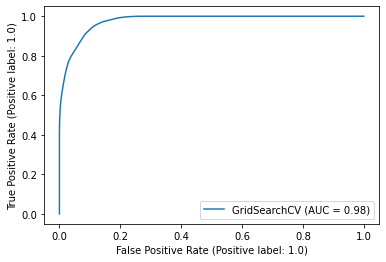

In [125]:
#A ROC curve is referred to as Receiver Operating Characteristic Curve; basically, it is the plot that summarizes the model’s binary classification performance on the positive 
#class. AUC is referred to as Area Under the Curve. Where X-axis indicates the False Positive Rate and Y-axis indicates the True Positive Rate. This plot gives the information of how the model is 
#predicting the correct classification and wrong classifications.

plot_roc_curve(grid_search2, X_train,y_train )

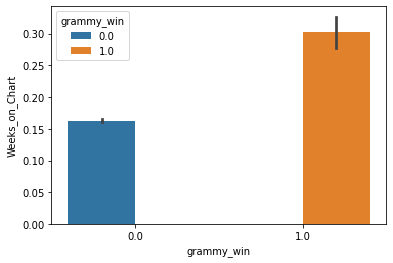

In [126]:

ax = sns.barplot(x="grammy_win", y="Weeks_on_Chart", hue="grammy_win", data=data)


<AxesSubplot:xlabel='Peak_Position', ylabel='Weeks_on_Chart'>

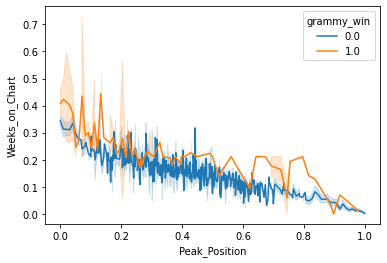

In [127]:

sns.lineplot(data=data, x="Peak_Position", y="Weeks_on_Chart",hue="grammy_win")


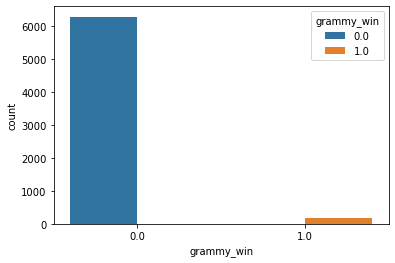

In [75]:
ax = sns.countplot(x="grammy_win", hue="grammy_win", data=data)

In [81]:
data

,Artist,Name,Genre,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,grammy_win
0,LIL NAS X,OLD TOWN ROAD,"COUNTRY,ATLANTA,ALTERNATIVE COUNTRY,HIP-HOP,TR...",0.118093,0.000000,0.058824,0.0
1,"SHAWN MENDES, CAMILA CABELLO",SENORITA,POP,0.384799,0.136735,0.209412,0.0
2,BILLIE EILISH,BAD GUY,"HIP-HOP,DARK POP,HOUSE,TRAP,MEMES,ALTERNATIVE ...",0.450932,0.010204,0.129412,0.0
3,KHALID,TALK,"SYNTH-POP,POP",0.307484,0.020408,0.211765,0.0
4,"ED SHEERAN, JUSTIN BIEBER",I DON'T CARE,"CANADA,UK,DANCE,DANCE-POP,POP",0.354845,0.010204,0.058824,0.0
...,...,...,...,...,...,...,...
6454,FATBOY SLIM,PRAISE YOU,"TECHNO,POP",0.883851,0.357143,0.211765,0.0
6455,COLLIN RAYE,ANYONE ELSE,COUNTRY,0.901129,0.367347,0.211765,0.0
6456,TRICK DADDY,NANN,RAP,0.690269,0.622449,0.211765,0.0
6457,CLAY WALKER,SHE'S ALWAYS RIGHT,POP,0.835929,0.744898,0.047059,0.0


In [112]:
from wordcloud import WordCloud

artist=data['Artist']
artist
flag=data['grammy_win']==1.0
d=data.where(flag==True).dropna()
d['Artist']

,Artist,Name,Genre,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,grammy_win
41,"LADY GAGA, BRADLEY COOPER",SHALLOW,"POP COUNTRY,FOLK,MUSICALS,SCREEN,POP-ROCK,SOUN...",0.915528,0.000000,0.435294,1.0
188,DAN + SHAY,TEQUILA,COUNTRY,0.135060,0.204082,0.564706,1.0
302,"SILK CITY, DUA LIPA",ELECTRICITY,"RETRO,DISCO,ELECTRO HOUSE,DANCE-POP,DANCE,ELEC...",0.957764,0.622449,0.094118,1.0
393,ELLA MAI,BOO'D UP,"UK,R&;B",0.809126,0.040816,0.388235,1.0
403,DANIEL CAESAR,BEST PART,"CANADA,R&;B",0.904969,0.755102,0.200000,1.0
...,...,...,...,...,...,...,...
6308,RAGE AGAINST THE MACHINE,GUERRILLA RADIO,"RAP ROCK,FUNK ROCK,HEAVY METAL,RAP,ROCK",0.627555,0.693878,0.211765,1.0
6360,RED HOT CHILI PEPPERS,SCAR TISSUE,"BLUES ROCK,ADULT ALTERNATIVE,FUNK ROCK,ALTERNA...",0.118045,0.081633,0.317647,1.0
6368,LENNY KRAVITZ,AMERICAN WOMAN,"PRODUCER,SCREEN,COVER,SOUNDTRACK,ALTERNATIVE R...",0.873292,0.489796,0.223529,1.0
6378,SHANIA TWAIN,MAN! I FEEL LIKE A WOMAN!,"POP,COUNTRY,ROCK",0.841615,0.224490,0.305882,1.0


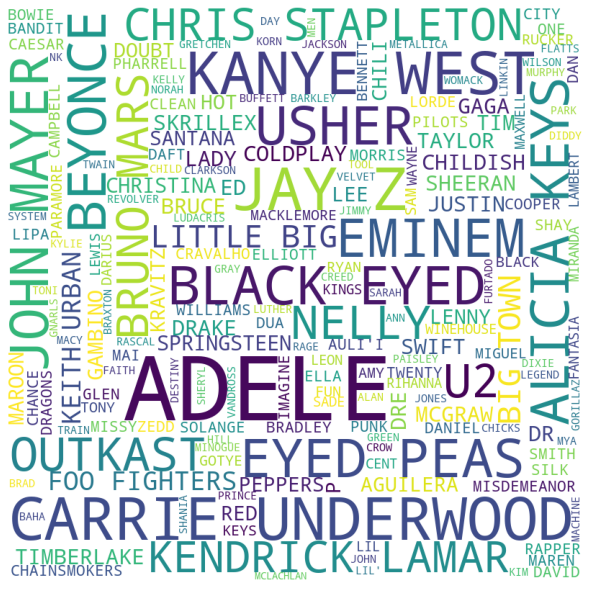

In [113]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(d['Artist']))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [114]:
d_copy=d.copy()
d_copy['Genre']=d_copy['Genre'].apply(lambda x: x.split(",",1)[0])

In [116]:
d_copy

,Artist,Name,Genre,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,grammy_win
41,"LADY GAGA, BRADLEY COOPER",SHALLOW,POP COUNTRY,0.915528,0.000000,0.435294,1.0
188,DAN + SHAY,TEQUILA,COUNTRY,0.135060,0.204082,0.564706,1.0
302,"SILK CITY, DUA LIPA",ELECTRICITY,RETRO,0.957764,0.622449,0.094118,1.0
393,ELLA MAI,BOO'D UP,UK,0.809126,0.040816,0.388235,1.0
403,DANIEL CAESAR,BEST PART,CANADA,0.904969,0.755102,0.200000,1.0
...,...,...,...,...,...,...,...
6308,RAGE AGAINST THE MACHINE,GUERRILLA RADIO,RAP ROCK,0.627555,0.693878,0.211765,1.0
6360,RED HOT CHILI PEPPERS,SCAR TISSUE,BLUES ROCK,0.118045,0.081633,0.317647,1.0
6368,LENNY KRAVITZ,AMERICAN WOMAN,PRODUCER,0.873292,0.489796,0.223529,1.0
6378,SHANIA TWAIN,MAN! I FEEL LIKE A WOMAN!,POP,0.841615,0.224490,0.305882,1.0


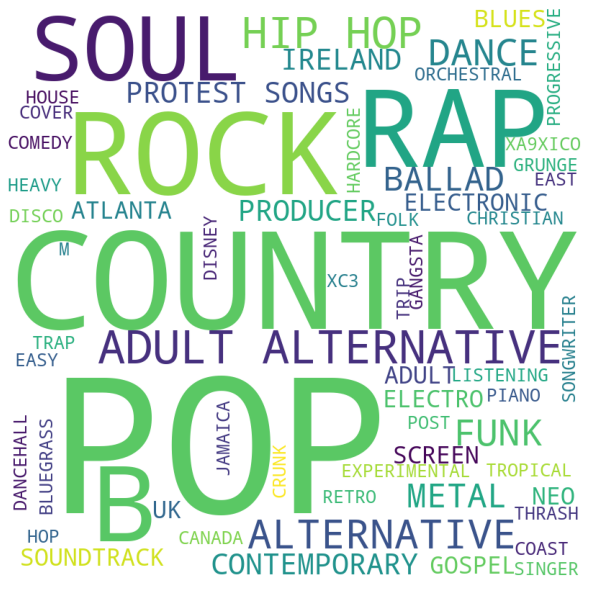

In [117]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(d_copy['Genre']))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [119]:
data['Genre']=data['Genre'].apply(lambda x: x.split(",",1)[0])

In [120]:
data

,Artist,Name,Genre,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,grammy_win
0,LIL NAS X,OLD TOWN ROAD,COUNTRY,0.118093,0.000000,0.058824,0.0
1,"SHAWN MENDES, CAMILA CABELLO",SENORITA,POP,0.384799,0.136735,0.209412,0.0
2,BILLIE EILISH,BAD GUY,HIP-HOP,0.450932,0.010204,0.129412,0.0
3,KHALID,TALK,SYNTH-POP,0.307484,0.020408,0.211765,0.0
4,"ED SHEERAN, JUSTIN BIEBER",I DON'T CARE,CANADA,0.354845,0.010204,0.058824,0.0
...,...,...,...,...,...,...,...
6454,FATBOY SLIM,PRAISE YOU,TECHNO,0.883851,0.357143,0.211765,0.0
6455,COLLIN RAYE,ANYONE ELSE,COUNTRY,0.901129,0.367347,0.211765,0.0
6456,TRICK DADDY,NANN,RAP,0.690269,0.622449,0.211765,0.0
6457,CLAY WALKER,SHE'S ALWAYS RIGHT,POP,0.835929,0.744898,0.047059,0.0


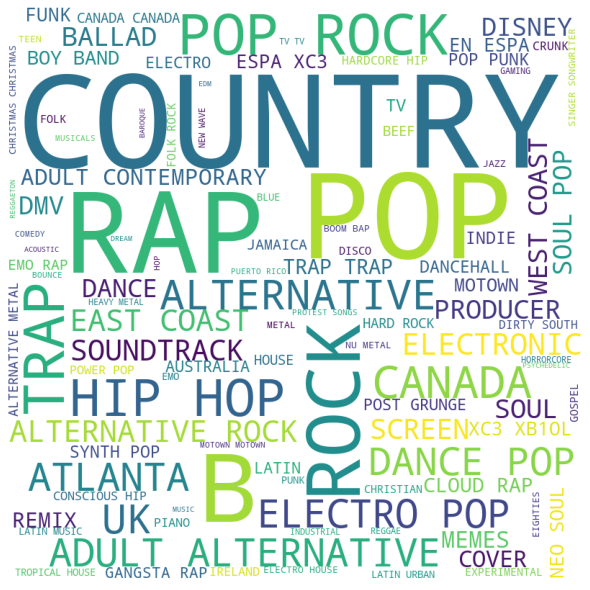

In [121]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(data['Genre']))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [129]:
d=data.groupby(['Genre','grammy_win']).count()
d=d.sort_values(by='Name', ascending=False)
d

,,Artist,Name,Weekly_rank_avg,Peak_Position,Weeks_on_Chart
Genre,grammy_win,,,,,
COUNTRY,0.0,1041,1041,1041,1041,1041
POP,0.0,883,883,883,883,883
RAP,0.0,795,795,795,795,795
R&;B,0.0,518,518,518,518,518
ROCK,0.0,315,315,315,315,315
...,...,...,...,...,...,...
DUBSTEP,0.0,1,1,1,1,1
METALCORE,0.0,1,1,1,1,1
METAL,1.0,1,1,1,1,1


In [192]:
d2 = data.groupby("grammy_win")["Genre"].unique()
genres=d2.tolist()


In [193]:
genre

[array(['COUNTRY', 'POP', 'HIP-HOP', 'SYNTH-POP', 'CANADA',
        'ALTERNATIVE POP', 'TRAP', 'ALTERNATIVE R&;B', 'MEMES', 'RAP',
        'UK', 'EAST COAST', 'DANCE-POP', 'POP-ROCK', 'ADULT ALTERNATIVE',
        'ELECTRO-POP', 'ATLANTA', 'DREAM-POP', 'ROCK', 'MOTOWN', 'R&;B',
        'LATIN POP', 'HARDCORE HIP-HOP', 'ALTERNATIVE ROCK', 'TEEN POP',
        'AUSTRALIA', 'ELECTRONIC POP', 'REGGAETON', 'BOUNCE', 'DANCEHALL',
        'ALTERNATIVE DANCE', 'PROGRESSIVE HOUSE', 'PUERTO RICO', 'EDM',
        'ELECTRO', 'NEO SOUL', 'FUTURE BASS', 'ELECTRO-FUNK', 'COLOMBIA',
        'WEST COAST', 'ALTERNATIVE', 'EXPERIMENTAL', 'BALLAD', 'INDIE',
        'ELECTRONIC TRAP', 'WORSHIP', 'NEW WAVE', 'REMIX', 'LATIN URBAN',
        'DOMINICAN REPUBLIC', 'INDIE POP', 'CHILLHOP', 'SOUL POP',
        'CLOUD RAP', 'TROPICAL HOUSE', 'EMO RAP', 'DANCE', 'SOUL',
        'ISLAND MUSIC', 'TV', 'MUSICALS', 'NU DISCO', 'ELECTRONIC',
        'SCANDINAVIA', 'INSTRUMENTAL HIP-HOP', 'SOUNDTRACK', 'DMV',
        'THE

In [187]:
d11=pd.DataFrame(d2)
d2.dtypes

dtype('O')

In [163]:
 data.groupby("grammy_win")["Genre"].nunique()

grammy_win
0.0    230
1.0     64
Name: Genre, dtype: int64